# Image processing starter kit

This is the starter kit for your images project. There are a number of [image files](https://github.com/parrt/msds501/raw/master/projects/images-project-images.zip) we will use in this project so please download and unzip them. The files inside the zip look like this:

Make sure the unzipped image files are in the same directory as your `images.ipynb` file and that you are storing all files in the root of your repository. Do not create any subdirectories in your repository. (If you double-click on a zip file it tends to create a subdirectory so move the files afterwards).  Only add the notebook file to the repository, not the image files.

## View

In [35]:
######## START ###################

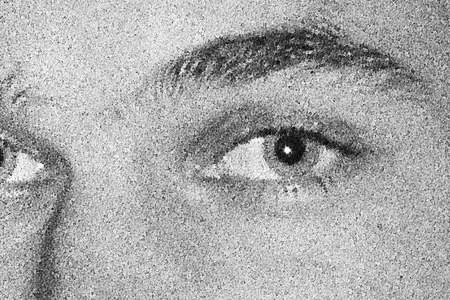

In [36]:
# open 'eye.png', convert to grayscale, flip, and display
from PIL import Image
import numpy as np

img = Image.open('eye.png')
img = img.convert("L") # grayscale
display(img)  # same as display(img)
#img.show()

## Flip

In [37]:
# define function flip()
def flip(img):
    width, height = img.size
    imgduplicate = img.copy()
    m_1 = img.load()
    m_2 = imgduplicate.load()
    for x in range(width):
        for y in range(height):
            m_2[x,y]=m_1[width-x-1,y]
            #m_2=m_2
    return   imgduplicate  

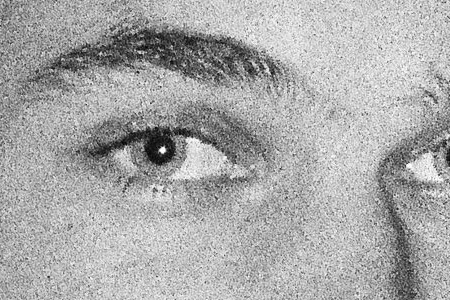

In [38]:
new_arr=flip(img)
type(new_arr)
new_arr.save("flipped_image.png")
new_arr

## Blur

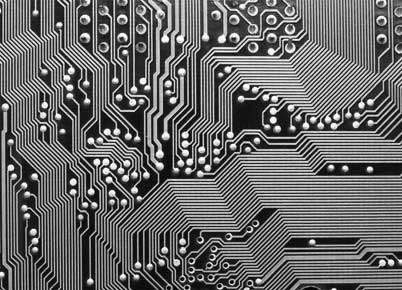

In [39]:
# define getpixel, region3x3, avg, and blur functions

img = Image.open('pcb.png')
img = img.convert("L") # make greyscale if not already (luminance)
img

In [40]:
def blur(img):
    width, height = img.size
    imgduplicate = img.copy()
    pixels=imgduplicate.load()
    for x in range(width):
        for y in range(height):
            r=region3x3(img,x,y)
            pixels[x,y]=avg(r)
    return imgduplicate
    

In [41]:
def avg(data):
    return int(sum(data)/len(data))


In [42]:
def region3x3(img,x,y):
    me = getpixel(img, x, y)
    N=getpixel(img, x, y - 1)
    S=getpixel(img, x, y + 1)
    W=getpixel(img, x-1, y)
    E=getpixel(img, x+1, y)
    SE=getpixel(img, x+1, y + 1)
    NW=getpixel(img, x-1, y - 1)
    NE=getpixel(img, x+1, y - 1)
    SW=getpixel(img, x-1, y + 1)
    
    return [me,N, S, E, W, NW, NE, SE, SW]
  

In [43]:
def getpixel(img,x,y):
    width, height = img.size
    pixel_matrix=img.load()
    if x<0:
        x=0
    if x>=width:
        x=width-1
    if y<0:
        y=0
    if y>=height:
        y=height-1      
    return pixel_matrix[x,y]

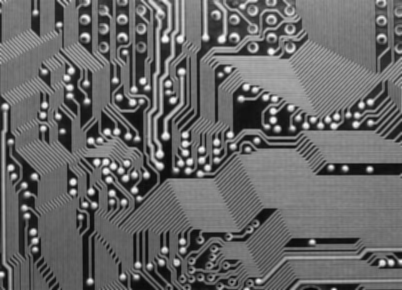

In [44]:
img = blur(img)
img

## Denoise

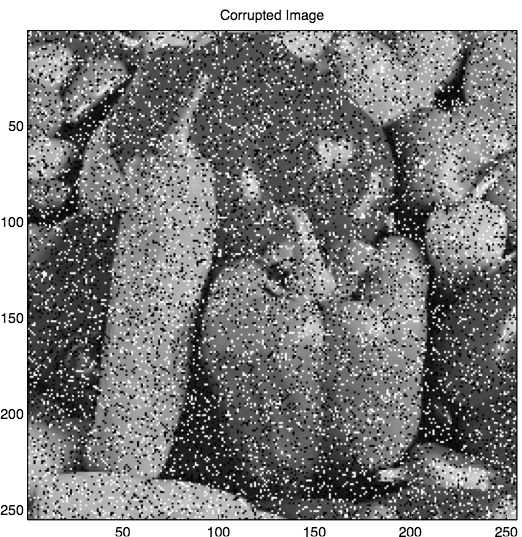

In [45]:
img = Image.open('Veggies_noise.jpg')
img = img.convert("L") # make greyscale if not already (luminance)
img

In [46]:
# define median and denoise functions

In [47]:
def denoise(img):
    width, height = img.size
    imgduplicate = img.copy()
    pixels=imgduplicate.load()
    for x in range(width):
        for y in range(height):
            r=region3x3(img,x,y)
            pixels[x,y]=median(r)
    return imgduplicate
    

In [48]:
def median(data):
    sort_data=sorted(data)
    index=round(len(sort_data)/2) 
    return int(sort_data[index])

In [49]:
def region3x3(img,x,y):
    me = getpixel(img, x, y)
    N=getpixel(img, x, y - 1)
    S=getpixel(img, x, y + 1)
    W=getpixel(img, x-1, y)
    E=getpixel(img, x+1, y)
    SE=getpixel(img, x+1, y + 1)
    NW=getpixel(img, x-1, y - 1)
    NE=getpixel(img, x+1, y - 1)
    SW=getpixel(img, x-1, y + 1)
    
    return [me,N, S, E, W, NW, NE, SE, SW]
  

In [50]:
def getpixel(img,x,y):
    width, height = img.size
    pixel_matrix=img.load()
    if x<0:
        x=0
    if x>=width:
        x=width-1
    if y<0:
        y=0
    if y>=height:
        y=height-1      
    return pixel_matrix[x,y]

In [51]:
# denoise 3 times and display

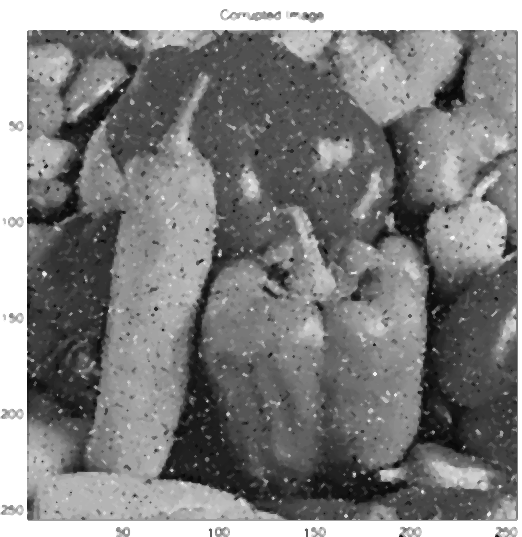

In [52]:
for i in range(3):
    img = denoise(img)
display(img)

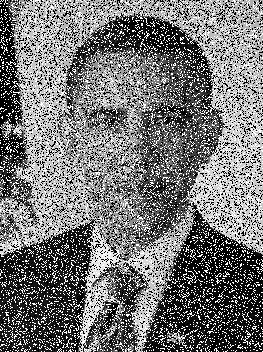

In [53]:
# show 'guesswho.png'
img = Image.open('guesswho.png')
img = img.convert("L") # make greyscale if not already (luminance)
img

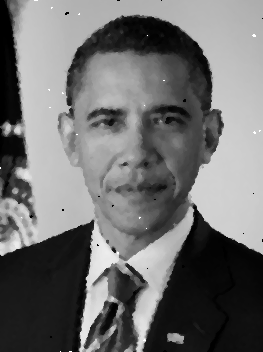

In [54]:
# denoise 3 times then display 
for i in range(3):
    img = denoise(img)
display(img)

## Generic filter

In [55]:
# define filter And open functions
def open(fname):
    img = Image.open(fname)
    img = img.convert("L")
    return img

### Blur refactored

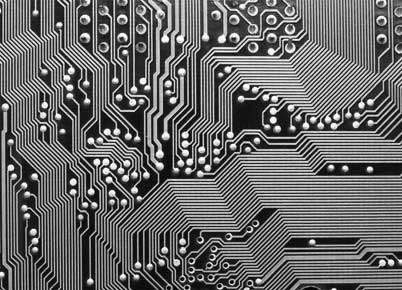

In [56]:
# Display 'pcb.png'
img = open('pcb.png')
img

In [57]:

def filter(img,f):
    width, height = img.size
    imgduplicate = img.copy()
    pixels=imgduplicate.load()
    for x in range(width):
        for y in range(height):
            r=region3x3(img,x,y)
            pixels[x,y]=f(r)
    return imgduplicate
    

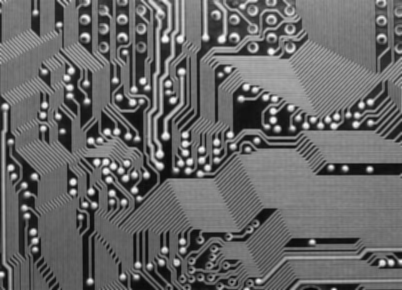

In [58]:
# use filter to blur the image
img = filter(img, avg)   
img   

### Denoise refactored

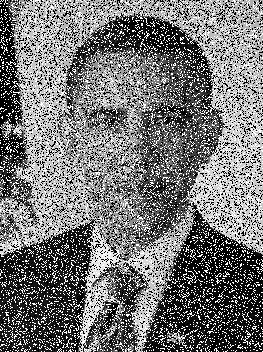

In [59]:
img = open('guesswho.png')
img

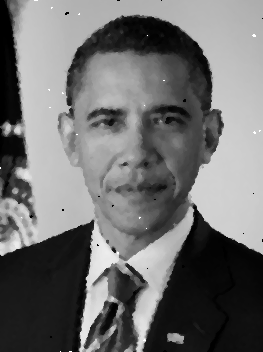

In [60]:
# using filter function, denoise the image
img = filter(img, median) 
img = filter(img, median)
img = filter(img, median)
display(img) 


## Edges

In [61]:
# define laplace function
def laplace(data):
    return ((data[1]+data[2]+data[3]+data[4])-(4*data[0]))

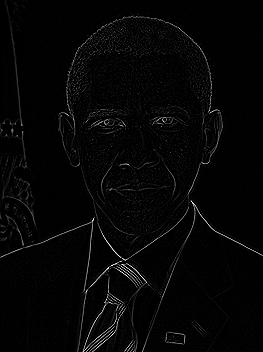

In [62]:
# Open 'obama.png' and show the edges
img = open('obama.png')

edges = filter(img, laplace)
display(edges)

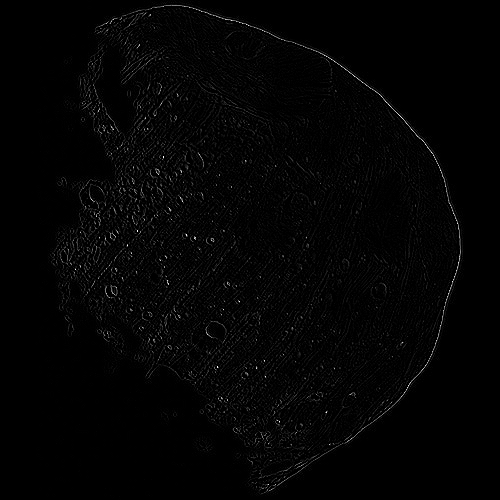

In [63]:
# Show the edges for 'phobos2.jpg
img = open('phobos2.jpg')

edges = filter(img, laplace)
edges


## Sharpen

In [64]:
# define minus function
def minus(A,B):
    width, height = A.size
    imgduplicate = A.copy()
    pixels=imgduplicate.load()
    img_pix=A.load()
    edge_pix=B.load()
    for x in range(width):
        for y in range(height):
              pixels[x,y]=img_pix[x,y]-edge_pix[x,y]   
    return imgduplicate

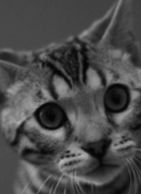

In [65]:
# display 'bonkers.png'
img = open('bonkers.png')
display(img)

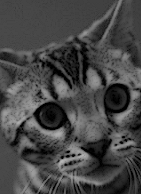

In [66]:
# sharpen that image and display it
sharpened_image=minus(img,filter(img, laplace))
sharpened_image

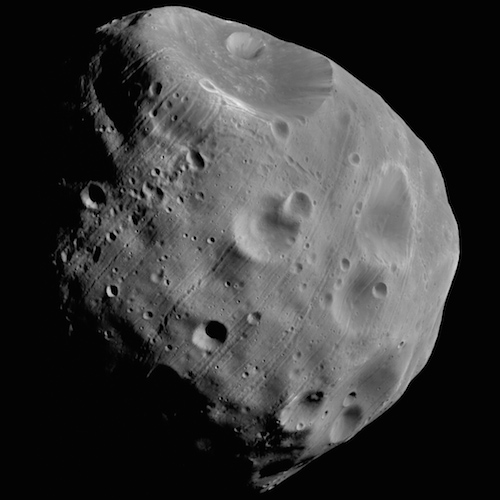

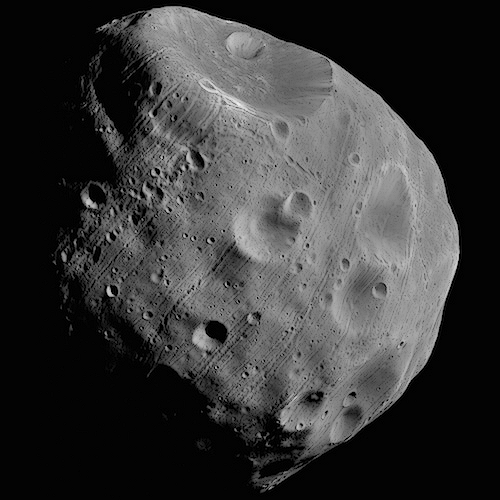

In [67]:
img = open('phobos2.jpg')
display(img)

sharpened_image=minus(img,filter(img, laplace))
sharpened_image

In [68]:
 ########## END  #################